In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

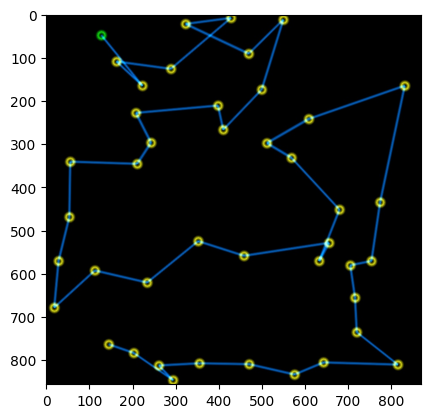

In [8]:
image = mpimg.imread('tsp-cv/32.jpg')

plt.imshow(image)

In [14]:
image = mpimg.imread('tsp-cv/0.jpg')

lower_yellow = np.array([90, 0, 0])
upper_yellow = np.array([255, 255, 255])

yellow_mask = cv2.inRange(image, lower_yellow, upper_yellow)

contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


(673, 503, 3)


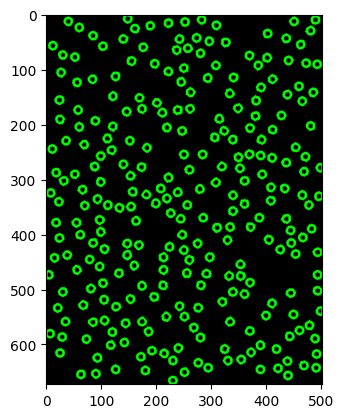

In [21]:
image = cv2.imread('tsp-cv/0.jpg')
# Plot the contours
black = np.zeros_like(image)
cv2.drawContours(black, contours, -1, (0, 255, 0), 3)
print(black.shape)
plt.imshow(black)



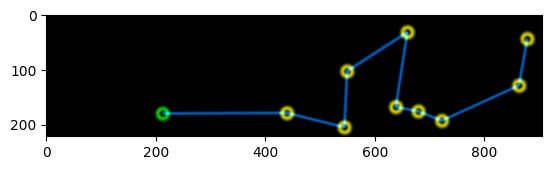

In [24]:
image = mpimg.imread('tsp-cv/1.jpg')

plt.imshow(image)

In [34]:
import circle_detection_functions
import pathfinder_functions

from functools import partial

In [26]:
circle_detecter_function = partial(circle_detection_functions.get_yellow_circles_cv2)

In [27]:
detected_positions = list(circle_detecter_function(image))

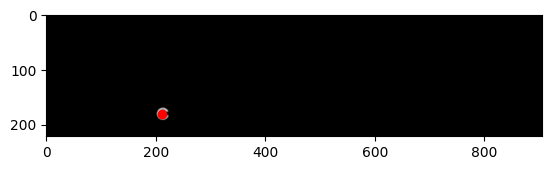

In [28]:
#detect the green circle
image_cp = image.copy()
image_cp = image_cp.astype('int32')
green_matrix = image_cp[:,:,1] - image_cp[:,:,0] - image_cp[:,:,2] - 100
green_matrix = green_matrix.clip(min=0)

all_green_positions = np.nonzero(green_matrix)

average_green_position = np.mean(all_green_positions, axis=1)

start_pos = (int(average_green_position[1]), int(average_green_position[0]))

plt.imshow(green_matrix, cmap='gray')
plt.plot(start_pos[0],start_pos[1], 'ro')


In [29]:
all_positions = detected_positions.copy()
all_positions.insert(0, start_pos)

In [41]:
matr = pathfinder_functions.get_connection_matrix(image,all_positions)

print('\n'.join(['\t'.join([f'{cell: 0.2f}' for cell in row]) for row in matr]))

 inf	 0.82	 0.68	 0.00	 0.45	 0.67	 0.91	 0.95	 0.95	 0.96
 0.82	 inf	 0.93	 0.00	 0.91	 0.93	 0.90	 0.00	 0.96	 0.89
 0.68	 0.93	 inf	 0.87	 0.00	 0.11	 0.00	 0.76	 0.93	 0.92
 0.00	 0.00	 0.87	 inf	 0.85	 0.88	 0.93	 0.94	 0.95	 0.47
 0.45	 0.91	 0.00	 0.85	 inf	 0.00	 0.90	 0.84	 0.97	 0.85
 0.67	 0.93	 0.11	 0.88	 0.00	 inf	 0.92	 0.91	 0.97	 0.00
 0.91	 0.90	 0.00	 0.93	 0.90	 0.92	 inf	 0.94	 0.00	 0.97
 0.95	 0.00	 0.76	 0.94	 0.84	 0.91	 0.94	 inf	 0.94	 0.00
 0.95	 0.96	 0.93	 0.95	 0.97	 0.97	 0.00	 0.94	 inf	 0.98
 0.96	 0.89	 0.92	 0.47	 0.85	 0.00	 0.97	 0.00	 0.98	 inf
